In [18]:
import math
import matplotlib.pyplot as plt

## Runge-Kutta Model  
Here we define the functions to solve a differential equation using the Runge-Kutta method

In [28]:
def rk4_step(t_i, y_i, dt, f):
    """this function takes a single step using the Runge-Kutta 4th order method 

    Args:
        t_i : The current time
        y_i : the current value of the function
        dt : the time step
        f : the function to be integrated

    Returns:
        the value of the function at the next time step
    """
    k1 = f(t_i, y_i)
    k2 = f(t_i + dt/2, y_i + k1*dt/2)
    k3 = f(t_i + dt/2, y_i + k2*dt/2)
    k4 = f(t_i + dt, y_i + k3*dt)
    return y_i + dt/6*(k1 + 2*k2 + 2*k3 + k4)


def solve(t_0: float, y_0: float, t_final: float, dt: float, f: callable):
    """_summary_

    Args:
        t_0 (float): _description_
        y_0 (float): _description_
        t_final (float): _description_
        dt (float): _description_
        f (callable): _description_
    """
    # computing result
    ts = [t_0]
    ys = [y_0]

    y = y_0    
    t = t_0

    while t < t_final:
        # Solving with Runge-Kutta
        y = rk4_step(t, y, dt, f)
        # Increasing t
        t += dt

        # Appending results
        ts.append(t)
        ys.append(y)

    return ts, ys

def find_closest(ys, xs, x):
    """ This function finds the closest value to x in the list xs and returns the corresponding value in ys

    Args:
        xs (list): xs is the list of x values with size n
        ys (list): ys is the list of y values with size n
        x (float): x is the value to be found

    Returns:
        the value of the function at the closest value to x
    """
    # Finding the closest value to x
    closest = min(xs, key=lambda x0: abs(x0 - x))
    # Returning the corresponding value
    return ys[xs.index(closest)]


def plot_graph(xs, ys):
    """We plot the graph of the function

    Args:
        xs (list): xs is the list of x values with size n
        ys (list): ys is the list of y values with size n
    """
    plt.plot(ys, xs, color='red', marker='o', linewidth=0.0, label='RK4')    
    plt.legend()
    plt.show()

## Ejercicio 2

In [11]:
# Constants for the model
R = 0.1
K = 1000

# Parameters for solving the model
P0 = 10  # initial value for p 
T0 = 0  # initial time
H = 0.1  # time step
T = 20  # final time

def f(t,p):
    global R, K
    return R*p*(1 - p/K)    

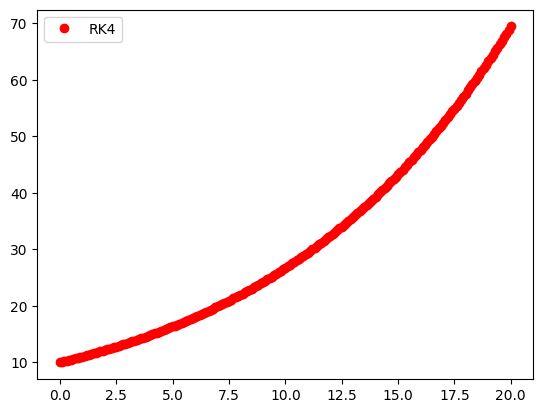

In [29]:
p_points, t_points = solve(T0, P0, T, H, f)
plot_graph(t_points, p_points)

In [22]:
find_closest(t_points, p_points, 20)

6.999999999999991